In [ ]:
# !pip install yfinance

In [1]:
import pandas as pd 
import yfinance as yf 

#### Ten cryptos to check 

In [67]:
CryptoPar = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'XRP-USD', 'ADA-USD', 'DOGE-USD', 
           'SOL-USD', 'DOT-USD', 'TRX-USD', 'LTC-USD']


---
# Testing Bitcoin

#### We use '2020-12-31' as date to begin the analysis

In [29]:
df = yf.download(CryptoPar[0], start='2020-12-31')

[*********************100%***********************]  1 of 1 completed


## DCA

In [30]:
# buydates took last day of month --> I supposedly bought bitcoin those days. 
print(CryptoPar[0])
buydates = pd.date_range(start=df.index[0], end=df.index[-1], freq='1M')
buydates

BTC-USD


DatetimeIndex(['2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31'],
              dtype='datetime64[ns]', freq='M')

In [31]:
# Extract from df the records on last day of the month and just for Close column
print(CryptoPar[0])
buyprices = df[df.index.isin(buydates)].Close
buyprices

BTC-USD


Date
2020-12-31    29001.720703
2021-01-31    33114.359375
2021-02-28    45137.769531
2021-03-31    58918.832031
2021-04-30    57750.175781
2021-05-31    37332.855469
2021-06-30    35040.835938
2021-07-31    41626.195312
2021-08-31    47166.687500
2021-09-30    43790.894531
2021-10-31    61318.957031
2021-11-30    57005.425781
2021-12-31    46306.445312
2022-01-31    38483.125000
2022-02-28    43193.234375
2022-03-31    45538.675781
2022-04-30    37714.875000
2022-05-31    31792.310547
2022-06-30    19784.726562
2022-07-31    23336.896484
2022-08-31    20049.763672
2022-09-30    19431.789062
2022-10-31    20495.773438
Name: Close, dtype: float64

In [32]:
# How much bitcoin bought monthly: if a use us $ 500
print(CryptoPar[0])
btc_amt = 500/buyprices
btc_amt

BTC-USD


Date
2020-12-31    0.017240
2021-01-31    0.015099
2021-02-28    0.011077
2021-03-31    0.008486
2021-04-30    0.008658
2021-05-31    0.013393
2021-06-30    0.014269
2021-07-31    0.012012
2021-08-31    0.010601
2021-09-30    0.011418
2021-10-31    0.008154
2021-11-30    0.008771
2021-12-31    0.010798
2022-01-31    0.012993
2022-02-28    0.011576
2022-03-31    0.010980
2022-04-30    0.013257
2022-05-31    0.015727
2022-06-30    0.025272
2022-07-31    0.021425
2022-08-31    0.024938
2022-09-30    0.025731
2022-10-31    0.024395
Name: Close, dtype: float64

In [33]:
# seeing in a accummulating perspective
btc_amt_sum =  btc_amt.cumsum()
btc_amt_sum

Date
2020-12-31    0.017240
2021-01-31    0.032340
2021-02-28    0.043417
2021-03-31    0.051903
2021-04-30    0.060561
2021-05-31    0.073954
2021-06-30    0.088223
2021-07-31    0.100235
2021-08-31    0.110835
2021-09-30    0.122253
2021-10-31    0.130407
2021-11-30    0.139179
2021-12-31    0.149976
2022-01-31    0.162969
2022-02-28    0.174545
2022-03-31    0.185524
2022-04-30    0.198782
2022-05-31    0.214509
2022-06-30    0.239781
2022-07-31    0.261206
2022-08-31    0.286144
2022-09-30    0.311875
2022-10-31    0.336270
Name: Close, dtype: float64

In [34]:
# naming column
btc_amt_sum.name = 'btc_amt_DCA'

In [35]:
# How much bitcoin would i have if I used DCA purchases?
print(CryptoPar[0])
btc_amt = 500/buyprices
btc_dca = btc_amt.sum()
btc_dca

BTC-USD


0.3362704431797148

In [36]:
# if a bought BTC using us $ 500 monthly during the len of buyprice
Total_USD = 500 * len(buyprices)
Total_USD

11500

In [37]:
print(f'So, use USD ${Total_USD} to bought {btc_dca} BTC using DCA Stategy')

So, use USD $11500 to bought 0.3362704431797148 BTC using DCA Stategy


## Lump Sum

In [38]:
# So if I were bought us $ 11000 on the first day (Lump Sum) I had btc_amt_LS bitcoins
btc_amt_LS = 500 * len(buyprices) / buyprices[0]
btc_amt_LS

0.39652819629977504

In [39]:
# Then, the difference (in BTC) between the DCA and the Lump Sum strategy is
diff = btc_dca - btc_amt_LS
diff

-0.060257753120060265

So, in this case, if you had used the DCA strategy you would have **LESS** bitcoins than if you had made the acquisition of the bitcoins in a single purchase at the beginning of the period.

In [40]:
# let's concatenate btc_amt_sum with df
df_tog = pd.concat([btc_amt_sum, df], axis=1).ffill()
df_tog

,btc_amt_DCA,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-12-31,0.01724,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848
2021-01-01,0.01724,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,0.01724,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,0.01724,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,0.01724,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
...,...,...,...,...,...,...,...
2022-11-05,0.33627,21144.832031,21446.886719,21097.634766,21282.691406,21282.691406,37846047609
2022-11-06,0.33627,21285.056641,21345.376953,20920.191406,20926.486328,20926.486328,35082693210
2022-11-07,0.33627,20924.621094,21053.246094,20489.972656,20602.816406,20602.816406,53510852236


In [41]:
# adding Lump Sum column to df_tog
df_tog['btc_amt_LS'] = btc_amt_LS
df_tog

,btc_amt_DCA,Open,High,Low,Close,Adj Close,Volume,btc_amt_LS
Date,,,,,,,,
2020-12-31,0.01724,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848,0.396528
2021-01-01,0.01724,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,0.396528
2021-01-02,0.01724,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,0.396528
2021-01-03,0.01724,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,0.396528
2021-01-04,0.01724,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,0.396528
...,...,...,...,...,...,...,...,...
2022-11-05,0.33627,21144.832031,21446.886719,21097.634766,21282.691406,21282.691406,37846047609,0.396528
2022-11-06,0.33627,21285.056641,21345.376953,20920.191406,20926.486328,20926.486328,35082693210,0.396528
2022-11-07,0.33627,20924.621094,21053.246094,20489.972656,20602.816406,20602.816406,53510852236,0.396528


## DCA Approach Plot

<AxesSubplot:xlabel='Date'>

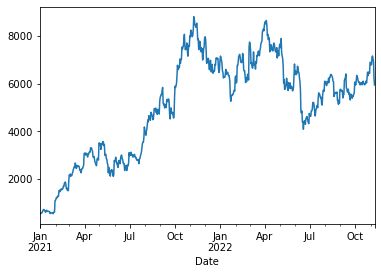

In [43]:
# Let's plot the portfolio in USD
(df_tog.btc_amt_DCA * df_tog.Close).plot()

In [44]:
# With DCA approach at the end we have in USD:
(df_tog.btc_amt_DCA * df_tog.Close)[-1]

5935.944379739725

In [45]:
# With Lump Sum approach at the end we have in USD:
btc_amt_LS*(df_tog.Close[-1])

6999.631891453639

In [48]:
# difference in USD
(df_tog.btc_amt_DCA * df_tog.Close)[-1] - btc_amt_LS*(df_tog.Close[-1])

-1063.6875117139134

## Conclusions

In [57]:
print(f'With DCA You invested USD $ {Total_USD} and at the end you got USD\
$ {(df_tog.btc_amt_DCA * df_tog.Close)[-1]:.2f}')

With DCA You invested USD $ 11500 and at the end you got USD$ 5935.94


In [62]:
print(f'With Lump Sum You invested USD $ {Total_USD} and at the end you got USD\
    $ {btc_amt_LS * (df_tog.Close)[-1]:.2f}')

With Lump Sum You invested USD $ 11500 and at the end you got USD    $ 6999.63


## So, for this period of time and for bitcoin as asset we got losses with DCA and Lump Sum Strategy

---
# Testing ETHEREUM

In [3]:
df = yf.download(CryptoPar[1], start='2020-12-31')
print(CryptoPar[1])
buydates = pd.date_range(start=df.index[0], end=df.index[-1], freq='1M')
buyprices = df[df.index.isin(buydates)].Close

[*********************100%***********************]  1 of 1 completed
ETH-USD


In [4]:
# How much ethereum bought monthly: if a use us $ 500
eth_amt = 500/buyprices
eth_amt

Date
2020-12-31    0.677687
2021-01-31    0.380232
2021-02-28    0.353095
2021-03-31    0.260639
2021-04-30    0.180297
2021-05-31    0.184166
2021-06-30    0.219824
2021-07-31    0.197145
2021-08-31    0.145614
2021-09-30    0.166573
2021-10-31    0.116602
2021-11-30    0.107957
2021-12-31    0.135772
2022-01-31    0.185993
2022-02-28    0.171280
2022-03-31    0.152363
2022-04-30    0.183138
2022-05-31    0.257423
2022-06-30    0.468472
2022-07-31    0.297350
2022-08-31    0.321816
2022-09-30    0.376512
2022-10-31    0.317922
Name: Close, dtype: float64

In [6]:
# How much ethereum would i have if I used DCA purchases?
eth_amt_sum =  eth_amt.cumsum()
eth_amt_sum.name = 'eth_amt_DCA'
eth_amt = 500/buyprices
eth_dca = eth_amt.sum()
eth_dca

5.8578717803030775

In [7]:
# if a bought ETH using us $ 500 monthly during the len of buyprice
Total_USD = 500 * len(buyprices)
Total_USD

11500

In [8]:
print(f'So, use USD ${Total_USD} to bought {eth_dca} ETH using DCA Stategy')

So, use USD $11500 to bought 5.8578717803030775 ETH using DCA Stategy


In [9]:
# So if I were bought us $ 11000 on the first day (Lump Sum) I had eth_amt_LS eth
eth_amt_LS = 500 * len(buyprices) / buyprices[0]
eth_amt_LS

15.586807962925077

So, in this case, if you had used the DCA strategy you would have **LESS** ethereum than if you had made the acquisition of the ethereum in a single purchase at the beginning of the period.

<AxesSubplot:xlabel='Date'>

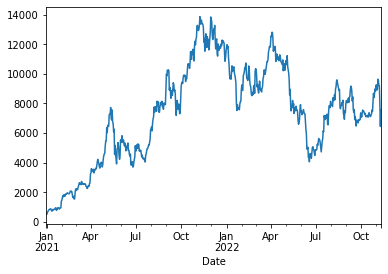

In [11]:
df_tog = pd.concat([eth_amt_sum, df], axis=1).ffill()
df_tog['eth_amt_LS'] = eth_amt_LS
(df_tog.eth_amt_DCA * df_tog.Close).plot()

In [12]:
# With DCA approach at the end we have in USD:
(df_tog.eth_amt_DCA * df_tog.Close)[-1]

7535.792364023789

In [13]:
# With Lump Sum approach at the end we have in USD:
eth_amt_LS*(df_tog.Close[-1])

20051.4713929841

## Conclusions

In [14]:
print(f'With DCA You invested USD $ {Total_USD} and at the end you got USD\
$ {(df_tog.eth_amt_DCA * df_tog.Close)[-1]:.2f}')

With DCA You invested USD $ 11500 and at the end you got USD$ 7535.79


In [15]:
print(f'With Lump Sum You invested USD $ {Total_USD} and at the end you got USD\
    $ {eth_amt_LS * (df_tog.Close)[-1]:.2f}')

With Lump Sum You invested USD $ 11500 and at the end you got USD    $ 20051.47


## So, for this period of time for Ethereum as asset we got losses if we had used DCA, but we would have made significant profits using Lump Sum strategy.

---
# Come get some!
---

[*********************100%***********************]  1 of 1 completed
BTC-USD
[*********************100%***********************]  1 of 1 completed
ETH-USD
[*********************100%***********************]  1 of 1 completed
BNB-USD
[*********************100%***********************]  1 of 1 completed
XRP-USD
[*********************100%***********************]  1 of 1 completed
ADA-USD
[*********************100%***********************]  1 of 1 completed
DOGE-USD
[*********************100%***********************]  1 of 1 completed
SOL-USD
[*********************100%***********************]  1 of 1 completed
DOT-USD
[*********************100%***********************]  1 of 1 completed
TRX-USD
[*********************100%***********************]  1 of 1 completed
LTC-USD
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

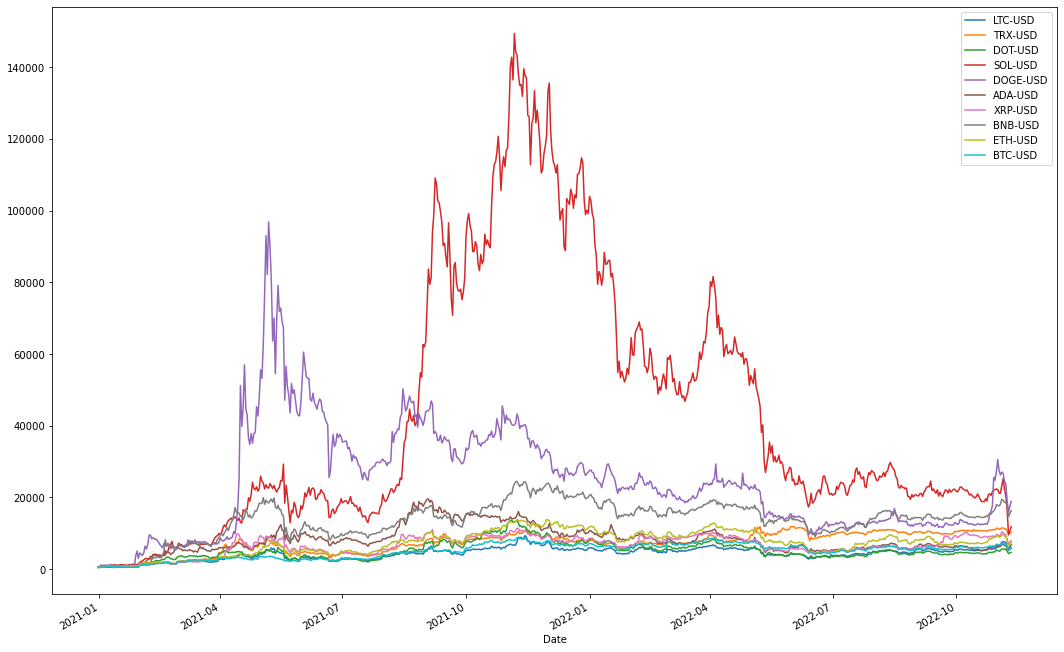

In [69]:
initial_date = '2020-12-31'
initial_amount = 500
# bucket_df store all the Cryptopar coins with the cummulate crypto value by date
bucket_df = yf.download(CryptoPar[0], start=initial_date)
bucket_df = bucket_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'] , axis=1)
for pair in CryptoPar: 
    print(pair)
    df = yf.download(pair, start=initial_date)
    df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'] , axis=1)
    buydates = pd.date_range(start=df.index[0], end=df.index[-1], freq='1M')
    buyprices = df[df.index.isin(buydates)].Close
    crypto_amt = initial_amount / buyprices
    crypto_amt_sum = crypto_amt.cumsum()
    crypto_amt_sum.name = pair
    bucket_df.drop(columns='Close', inplace=True)
    bucket_df = pd.concat([crypto_amt_sum, bucket_df], axis=1).ffill()
    bucket_df = pd.concat([bucket_df, df], axis=1)
    bucket_df[pair] = bucket_df[pair] * bucket_df['Close']

bucket_df.drop(columns='Close', inplace=True)
bucket_df.plot(figsize=(18,12))

## Surprise, Surprice

Let's look at Solana or Doge-coin! 


but most of the coins would have caused losses ...